# Import and settings

In [1]:
%load_ext autoreload
%autoreload 2

import os, re, gc, joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import seaborn as sn
import plotnine as pln
import anndata
import scanpy as sc
import scvelo as scv
import sctk as sk
import cellrank as cr

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
expr_cmap = sk.expression_colormap()
np.set_printoptions(linewidth=150)

import numpy_groupies as npg
from sklearn.preprocessing import minmax_scale
import plotnine as pln
from plotnine import ggplot, aes

# Load data

In [30]:
ad = sc.read('../20200615_stroma_pass2/fetal_skin.stroma_cells_pass2.processed.annotated.cellxgene.h5ad')

Only considering the two last: ['.cellxgene', '.h5ad'].
Only considering the two last: ['.cellxgene', '.h5ad'].


In [31]:
gc.collect()

594

In [32]:
ad

AnnData object with n_obs × n_vars = 119611 × 27117
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'n_counts', 'n_genes', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'annot', 'rachel_annot1', 'rachel_annot2', 'broad_annot', 'nh3_annot1'
    var: 'gene_ids', 'cc', 'mito', 'ribo', 'hb'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_bk'

In [6]:
full_ad = sc.read('../20210611_final_object/fetal_skin.norm.maternal_removed.20210611.h5ad', backed='r')

Only considering the two last: ['.20210611', '.h5ad'].
Only considering the two last: ['.20210611', '.h5ad'].


In [33]:
ad.obs_names.isin(full_ad.obs_names).sum()

119610

In [34]:
ad = ad[ad.obs_names.isin(full_ad.obs_names)].copy()

In [35]:
full_ad.obs_names.isin(ad.obs_names).sum()

119610

In [36]:
ad.obs = full_ad.obs.loc[full_ad.obs_names.isin(ad.obs_names), :].copy()

In [43]:
ad.obs['fig3_annotation'] = sk.regroup(
    ad, groupby='joint_annotation',
    regroups={'Fibroblast PEAR1+': 'Fibroblasts unknown', 'Pericytes': ['Pericytes', 'Smooth muscle LMCD1+', 'Smooth muscle PLN+']}
)

# Down-sample

In [37]:
adS = sk.subsample(ad, fraction=0.1)

In [38]:
adS

AnnData object with n_obs × n_vars = 11961 × 27117
    obs: 'sanger_id', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'cell_caller', 'scrublet_score', 'cluster_scrublet_score', 'doublet_pval', 'bh_doublet_pval', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'independent_annotation_refined', 'independent_annotation_broad1', 'independent_annotation_broad2', 'independent_annotation_broad3', 'independent_annotation_broad4', 'independent_annotation_broad5', 'joint_annotation', 'is_maternal', 'fig1b_annotation'
    var: 'gene_ids', 'cc', 'mito', 'ribo', 'hb'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_bk'

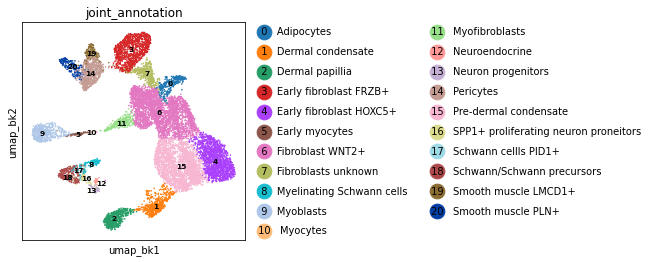

In [40]:
sk.plot_embedding(adS, basis='umap_bk', groupby='joint_annotation');

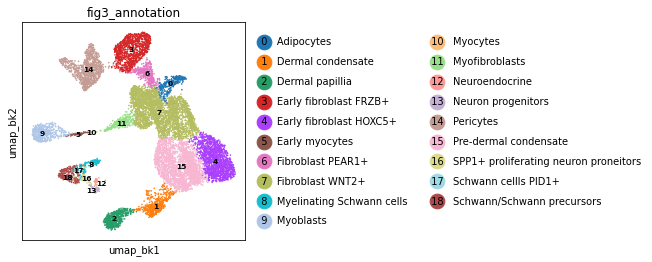

In [42]:
sk.plot_embedding(adS, basis='umap_bk', groupby='fig3_annotation');

In [44]:
adS.write('fetal_skin.stroma.maternal_removed.norm.downsampled.20211120.h5ad', compression='lzf')

In [45]:
ad.write('fetal_skin.stroma.maternal_removed.norm.20211120.h5ad', compression='lzf')